In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [6]:
boston_df=pd.read_csv(boston_url)

In [2]:
import pandas as pd

In [7]:
boston_df=pd.read_csv(boston_url)

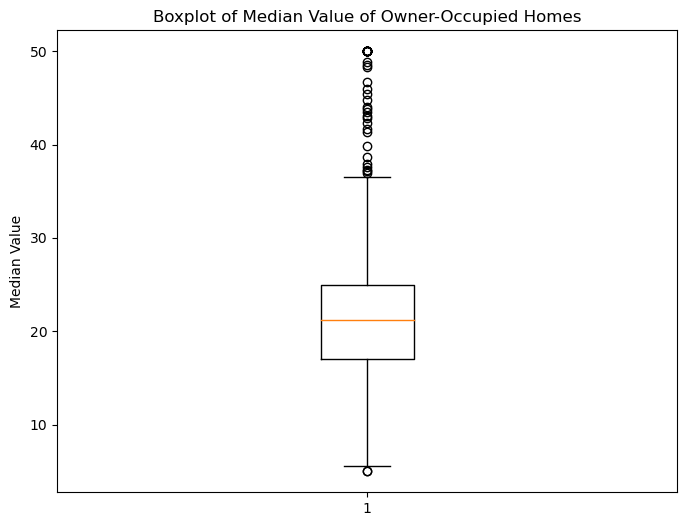

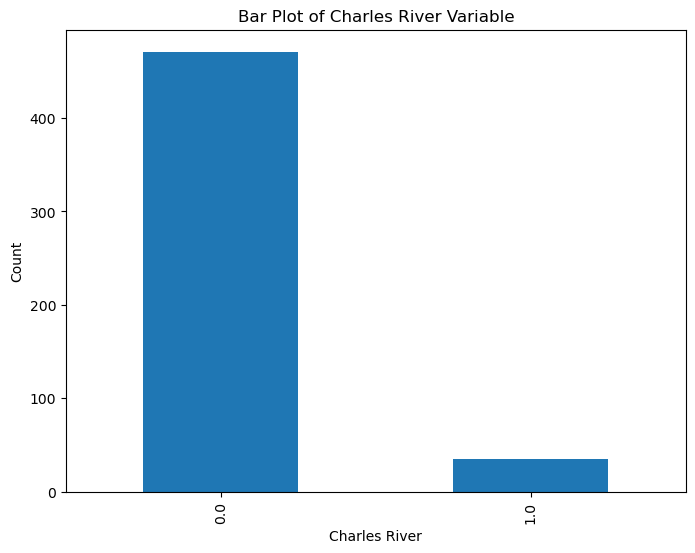

<Figure size 800x600 with 0 Axes>

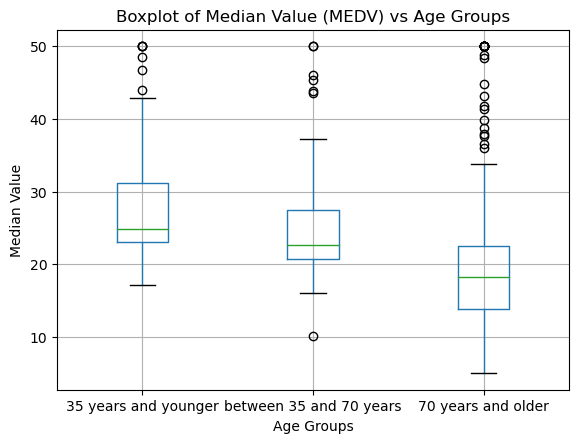

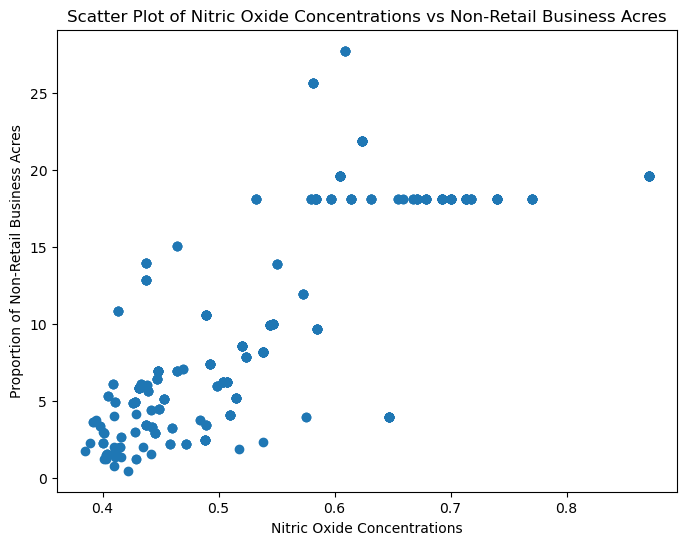

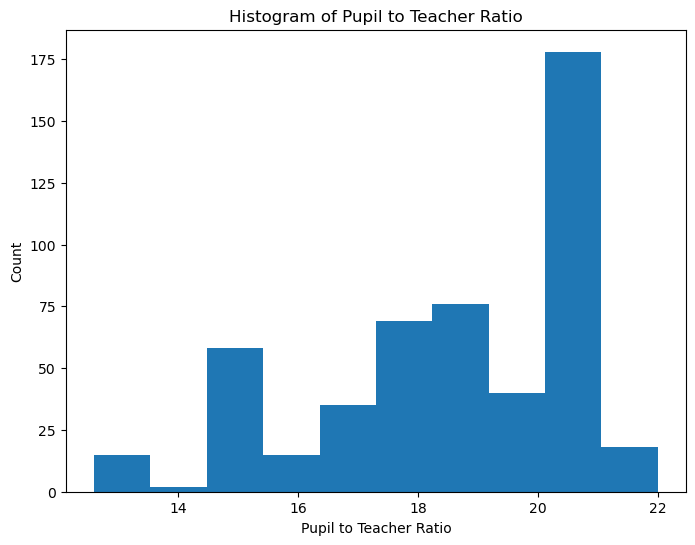

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the given URL
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value')
plt.show()

# Bar plot for Charles river variable
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River')
plt.ylabel('Count')
plt.show()

# Boxplot for MEDV variable vs AGE variable
age_groups = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
boston_df['Age_Groups'] = age_groups

plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='Age_Groups')
plt.title('Boxplot of Median Value (MEDV) vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value')
plt.suptitle('')  # Remove default title
plt.show()

# Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# Histogram for pupil to teacher ratio variable
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Count')
plt.show()


In [7]:
import scipy.stats as stats

# Extract MEDV values for houses bounded by the Charles River
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Extract MEDV values for houses not bounded by the Charles River
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(medv_river, medv_no_river)

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

T-Statistic: 3.9964
P-Value: 0.0001


In [8]:
import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(boston_df[boston_df['AGE'] <= 35]['MEDV'],
                                      boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV'],
                                      boston_df[boston_df['AGE'] > 70]['MEDV'])

# Print the F-statistic and p-value
print(f'F-Statistic: {f_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

F-Statistic: 36.4076
P-Value: 0.0000


In [9]:
import scipy.stats as stats

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the correlation coefficient and p-value
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-Value: {p_value:.4f}')

Correlation Coefficient: 0.7637
P-Value: 0.0000


In [10]:
import statsmodels.api as sm

# Prepare the predictor (independent) variable and the response (dependent) variable
X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        17:08:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [11]:
import scipy.stats as stats

# Extract MEDV values for houses bounded by the Charles River
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Extract MEDV values for houses not bounded by the Charles River
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(medv_river, medv_no_river)

# Print the t-statistic and p-value
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print("There is a significant difference in median values of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles River.")

T-Statistic: 3.9964
P-Value: 0.0001
There is a significant difference in median values of houses bounded by the Charles River.


In [12]:
import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(boston_df[boston_df['AGE'] <= 35]['MEDV'],
                                      boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV'],
                                      boston_df[boston_df['AGE'] > 70]['MEDV'])

# Print the F-statistic and p-value
print(f'F-Statistic: {f_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print("There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

F-Statistic: 36.4076
P-Value: 0.0000
There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [13]:
import scipy.stats as stats

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the correlation coefficient and p-value
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Correlation Coefficient: 0.7637
P-Value: 0.0000
There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [14]:
import statsmodels.api as sm

# Prepare the predictor (independent) variable and the response (dependent) variable
X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

if results.pvalues[1] < 0.05:
    print("The weighted distance to employment centers has a significant impact on the median value of owner-occupied homes.")
else:
    print("The weighted distance to employment centers does not have a significant impact on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        17:11:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0